In this notebook, we look at how the data is distributed in the various feature variables.

In [2]:
##Importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
##Loading the dataset
df_train = pd.read_csv("../../data/train_set.csv")

In [4]:
# Seperating features into subcategories

all_features = [   'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
               'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
               'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
               'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
               'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
               'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
               'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
               'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
               'Forgetfulness' , 'Diagnosis']
demo_features = ['Age', 'Gender', 'Ethnicity','EducationLevel','Diagnosis']
life_style_features = ['BMI','Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality','Diagnosis']
medic_hist_features = ['FamilyHistoryAlzheimers', 'CardiovascularDisease','Diabetes', 'Depression', 'HeadInjury', 'Hypertension','Diagnosis']
clinical_features = ['SystolicBP','DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL','CholesterolTriglycerides','Diagnosis']
cognitive_features = ['MMSE', 'FunctionalAssessment','MemoryComplaints', 'BehavioralProblems', 'ADL','Diagnosis']
symptoms_features = ['Confusion','Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks','Forgetfulness','Diagnosis']

no_cognitive = [item for item in all_features if item not in cognitive_features]
no_cognitive.append('Diagnosis')

subcategory_dict = {'all_features' : all_features,'demo':demo_features ,'lifestyle': life_style_features , 'medic' : medic_hist_features , 
                    'clinical':clinical_features , 'cognitive': cognitive_features , 'symptoms': symptoms_features , 'no_cognitive': no_cognitive}


categorical_features = ['Gender','Ethnicity', 'EducationLevel', 'Smoking' ,'FamilyHistoryAlzheimers', 
                    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
                    'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 
                    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
numerical_features = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
                    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 
                    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 
                    'FunctionalAssessment', 'ADL']

#### **Distribution of the Target Variable: `Diagnosis`**

Percentage of patients with Alzheimer’s: 35.35 %
Percentage of patients without Alzheimer’s: 64.65 %


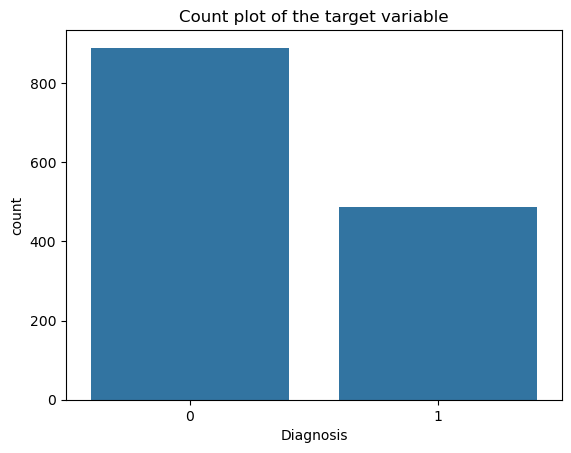

In [6]:
sns.countplot(x = df_train['Diagnosis'])
plt.title("Count plot of the target variable")
print("Percentage of patients with Alzheimer’s:", round((df_train['Diagnosis'].loc[df_train['Diagnosis'] == 1].shape[0] / df_train['Diagnosis'].shape[0]) * 100, 2), "%")
print("Percentage of patients without Alzheimer’s:", round((df_train['Diagnosis'].loc[df_train['Diagnosis'] == 0].shape[0] / df_train['Diagnosis'].shape[0]) * 100, 2), "%")

## **Distribution of Demographic Features**

We explore the how the data is distributed for these features in relation to the target varible, `Diagnosis`.

#### **Countplots**

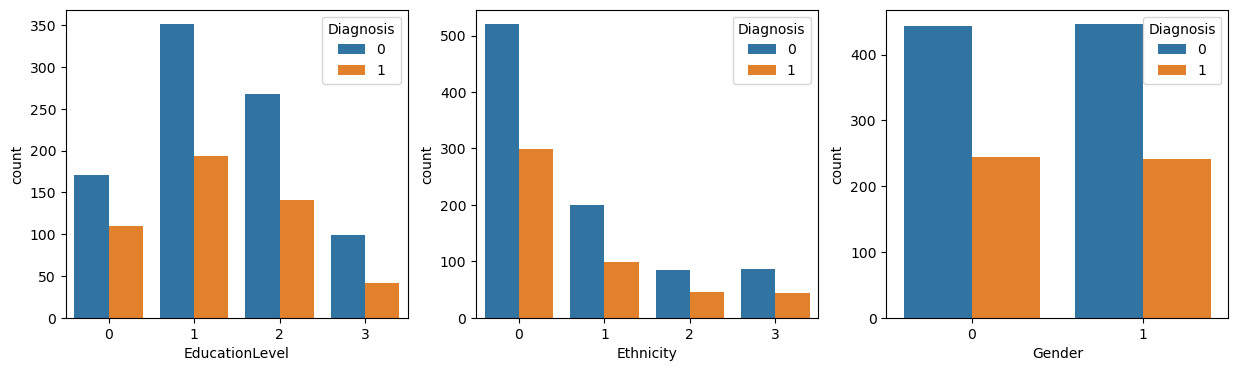

In [9]:
fig,axes = plt.subplots(1,3, figsize=(15,4))
sns.countplot(data=df_train, x='EducationLevel' , hue='Diagnosis',ax=axes[0])
sns.countplot(data=df_train, x='Ethnicity' , hue='Diagnosis', ax=axes[1])
sns.countplot(data=df_train, x='Gender' , hue='Diagnosis' , ax=axes[2])


plt.show()

### **Violin Plot for `Age`**

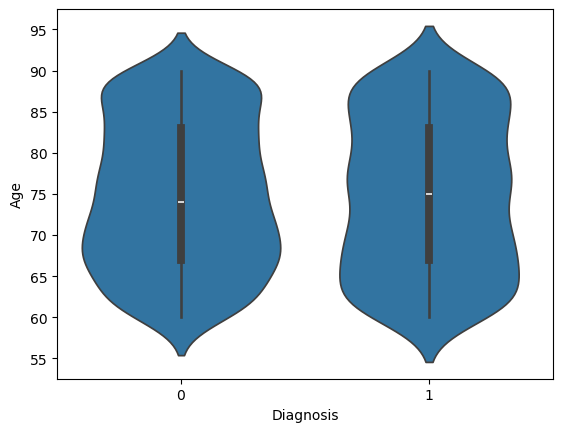

In [11]:
sns.violinplot(data = df_train , x='Diagnosis' , y='Age')
plt.show()

## **Distribution of Lifestyle Factors**

#### **Violin Plots**

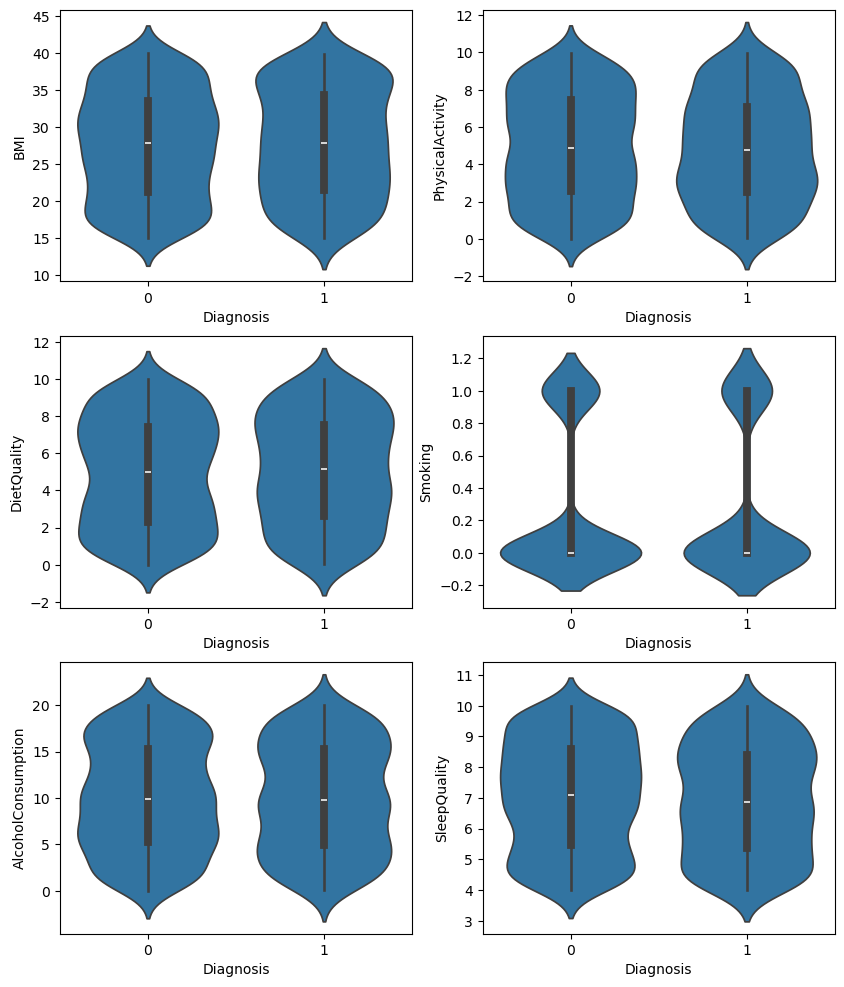

In [21]:
fig,axes = plt.subplots(3,2, figsize=(10,12))

for i in range(6):
    sns.violinplot(data=df_train , x= 'Diagnosis' , y = life_style_features[i] , ax=axes[i%3 , i%2])

plt.show()

#### **Count Plot

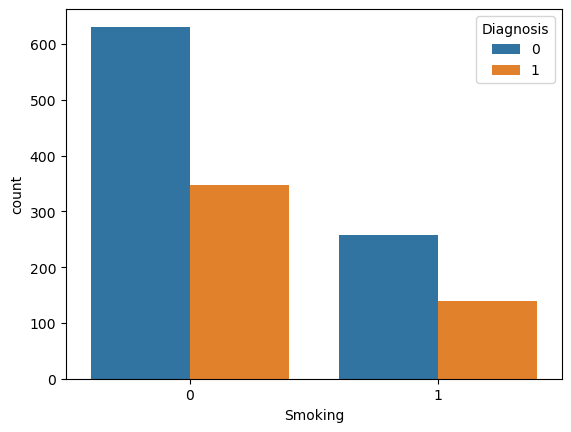

In [23]:
sns.countplot(data = df_train , x='Smoking' , hue= 'Diagnosis')
plt.show()

## **Distribution of Medical History Features**

#### **Count Plots**

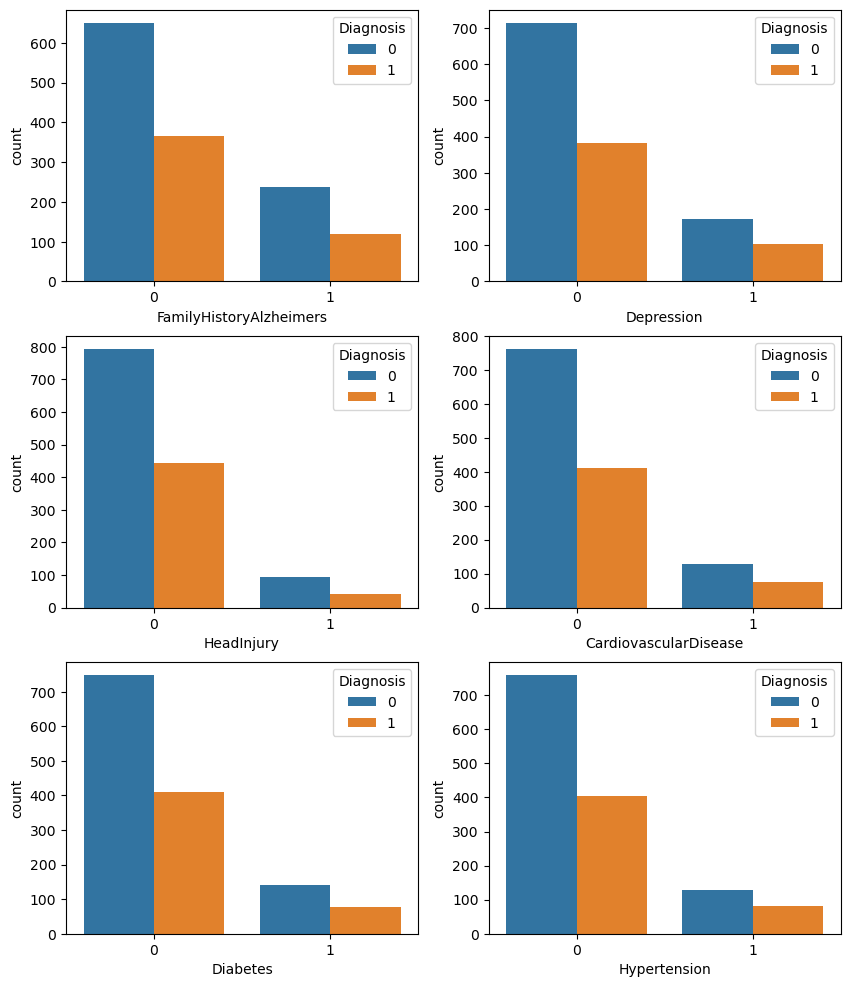

In [28]:
fig,axes = plt.subplots(3,2, figsize=(10,12))

for i in range(6):
    sns.countplot(data=df_train , hue= 'Diagnosis' , x = medic_hist_features[i] , ax=axes[i%3 , i%2])

plt.show()

## **Distribution of Clinical Measurements features**

#### **Violin Plots**

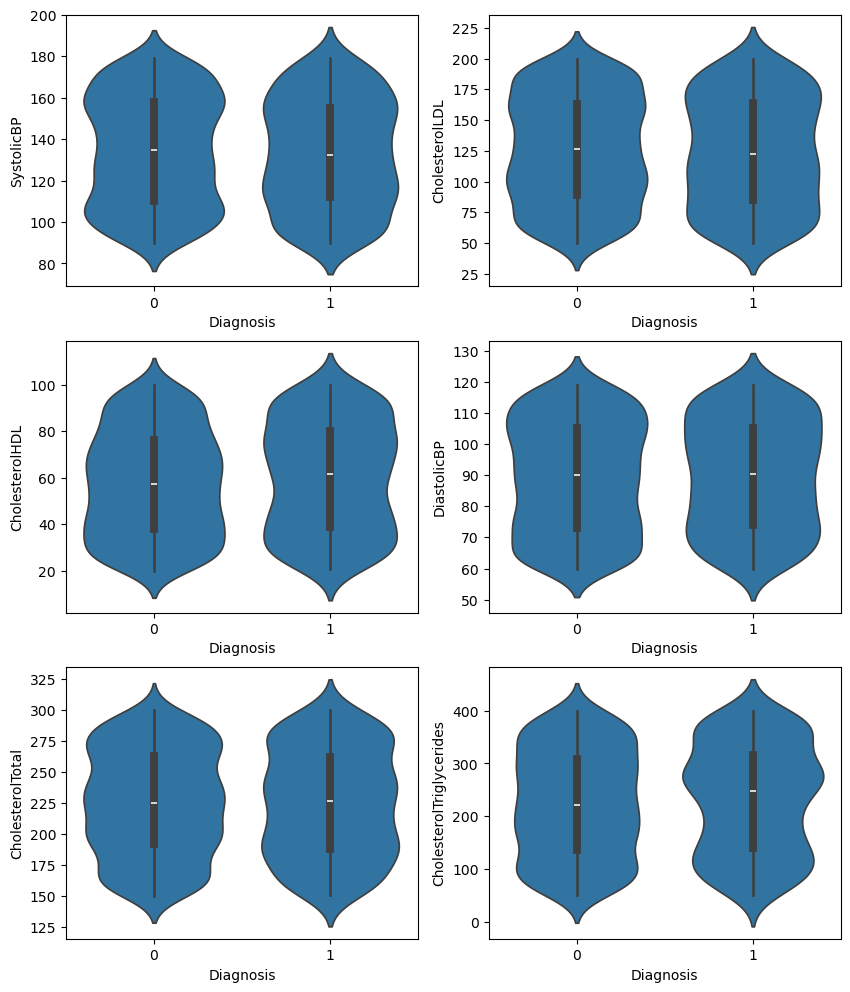

In [33]:
fig,axes = plt.subplots(3,2, figsize=(10,12))

for i in range(6):
    sns.violinplot(data=df_train , x= 'Diagnosis' , y = clinical_features[i] , ax=axes[i%3 , i%2])

plt.show()

## **Distribution of Cognitive and Functional Assessments features**

#### **Violinplots for numeric features within the subcategory of Cognitive features based on `Diagnosis`**

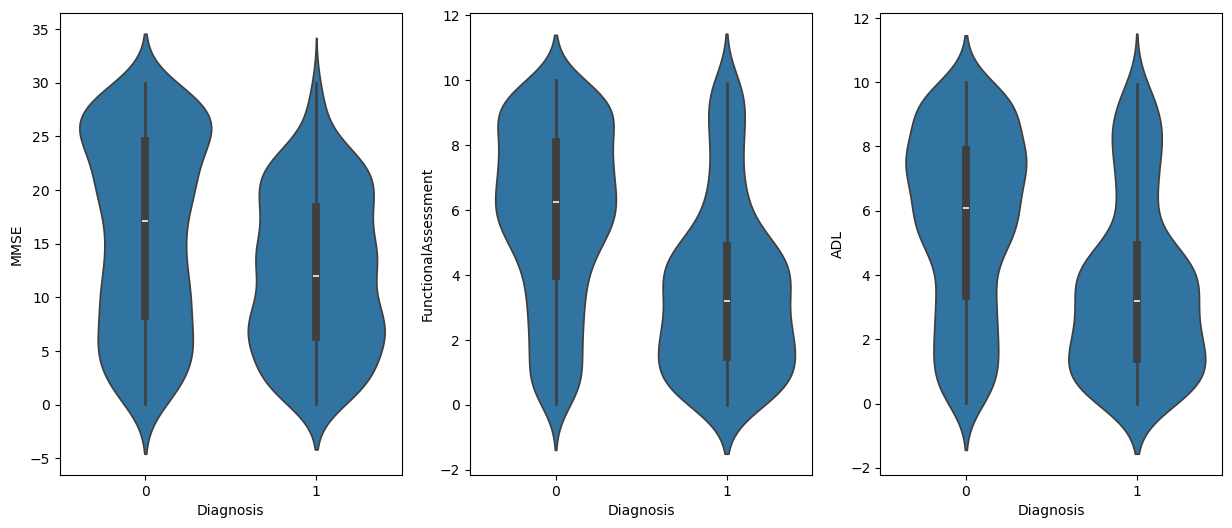

In [36]:
fig,axes = plt.subplots(1,3,figsize=(15,6))

sns.violinplot(data= df_train , x='Diagnosis' , y='MMSE' , ax=axes[0])
sns.violinplot(data= df_train , x='Diagnosis' , y='FunctionalAssessment' , ax=axes[1])
sns.violinplot(data= df_train , x='Diagnosis' , y='ADL' , ax=axes[2])

plt.show()

**Note:** Patients with positive diagnosis typically have lower scores in cognitive numeric features `MMSE`, `FunctionalAssessment`, and `ADL`.

#### **Countplots for categorical features `MemoryComplaints` and `BehavorialProblems` based on `Diagnosis`**

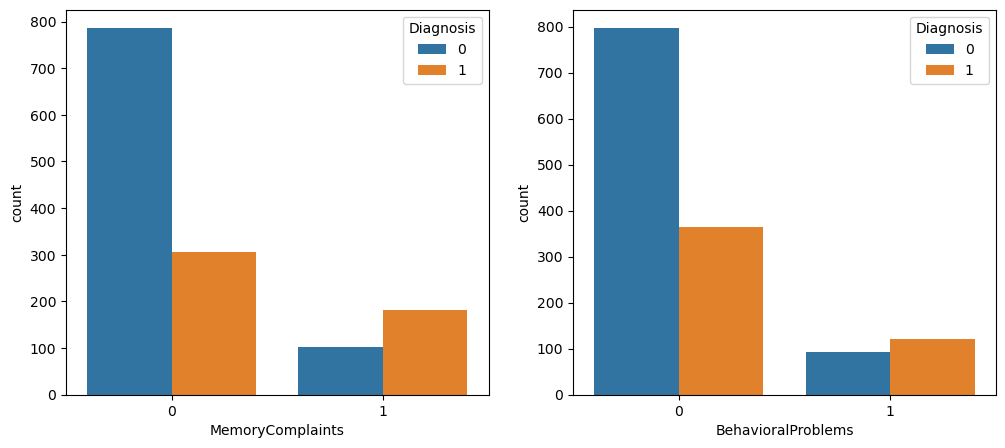

In [39]:
fig,axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(data = df_train, hue='Diagnosis' , x='MemoryComplaints' , ax=axes[0] )
sns.countplot(data = df_train, hue='Diagnosis' , x='BehavioralProblems' , ax=axes[1] )
plt.show()

**Note:** Patients who have Memory Complaints and Behavioral Problems are significantly more likely to be positively diagnosed.

## **Distribution of Symptoms features**


#### **Countplots for Symptoms based on `Diagnosis`**

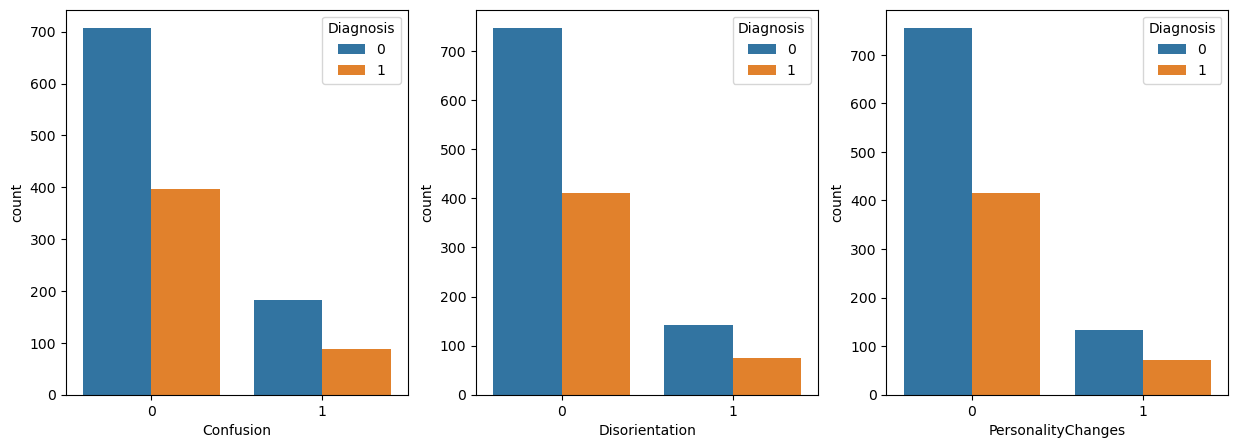

In [42]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.countplot(data = df_train, hue='Diagnosis' , x='Confusion' , ax=axes[0] )
sns.countplot(data = df_train, hue='Diagnosis' , x='Disorientation' , ax=axes[1] )
sns.countplot(data = df_train, hue='Diagnosis' , x='PersonalityChanges' , ax=axes[2] )
plt.show()

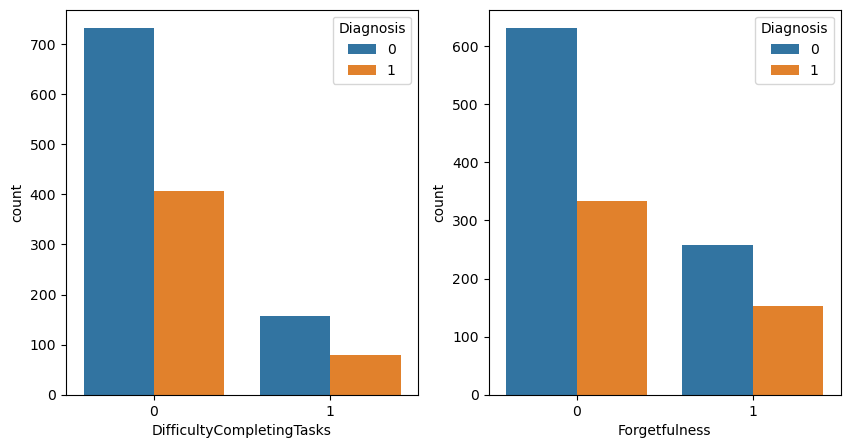

In [43]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.countplot(data = df_train, hue='Diagnosis' , x='DifficultyCompletingTasks' , ax=axes[0] )
sns.countplot(data = df_train, hue='Diagnosis' , x='Forgetfulness' , ax=axes[1] )
plt.show()

### **Confusion Matrices for Boolean Features Vs Diagnosis**

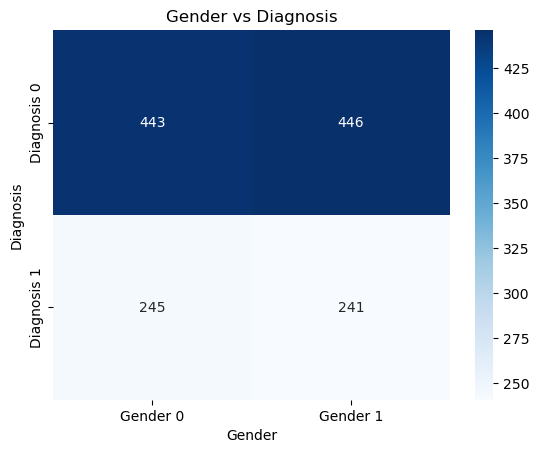

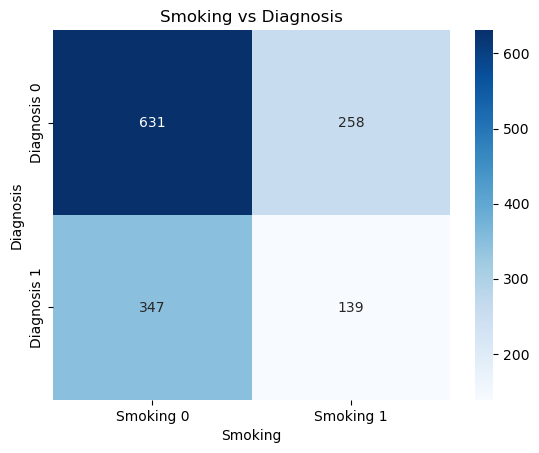

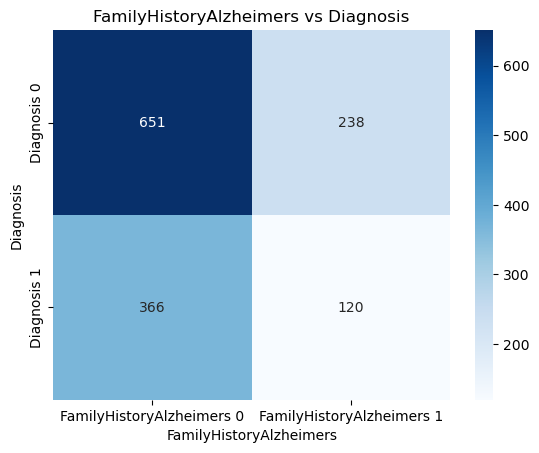

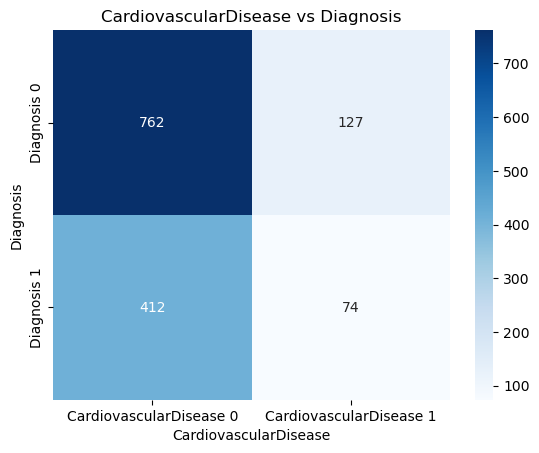

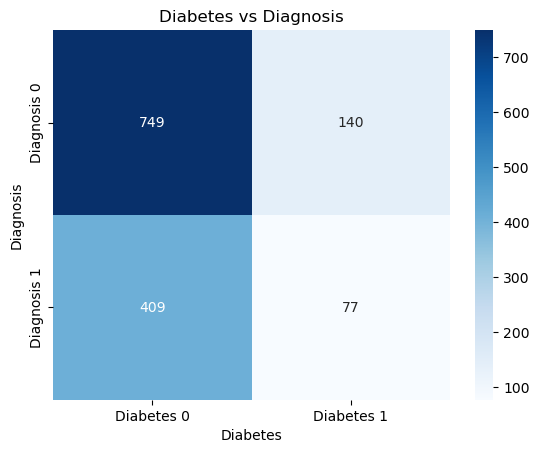

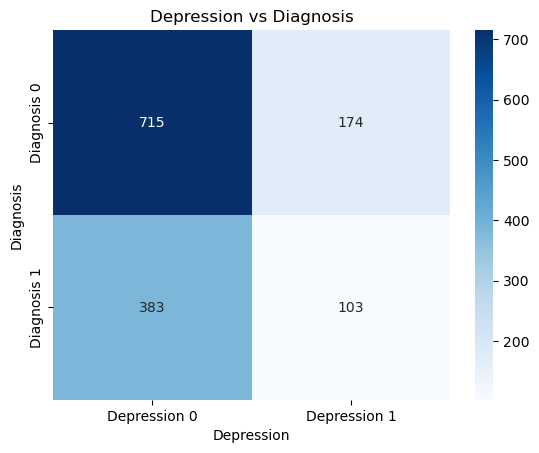

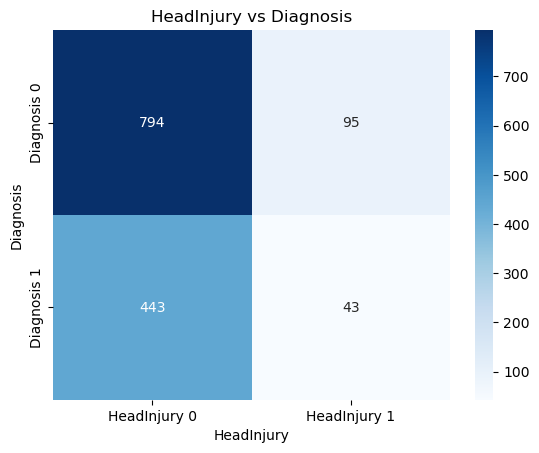

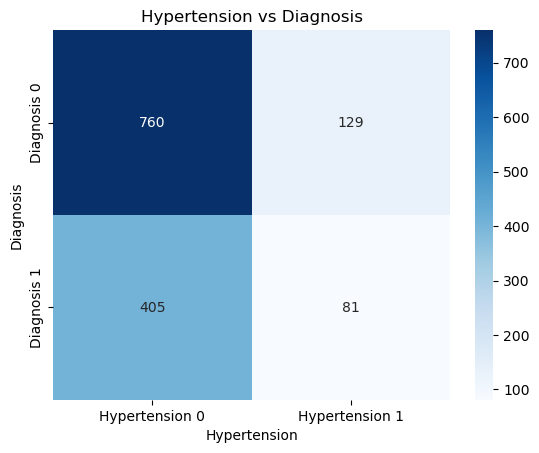

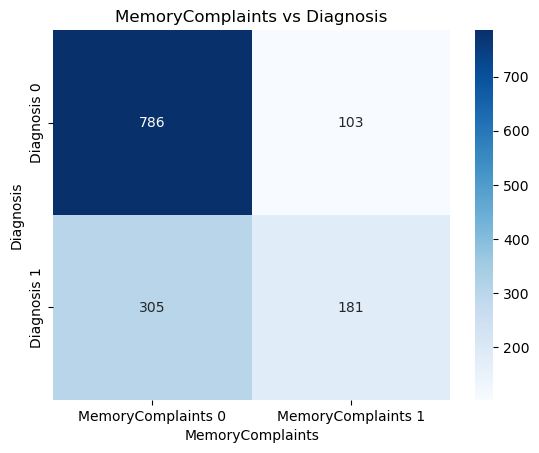

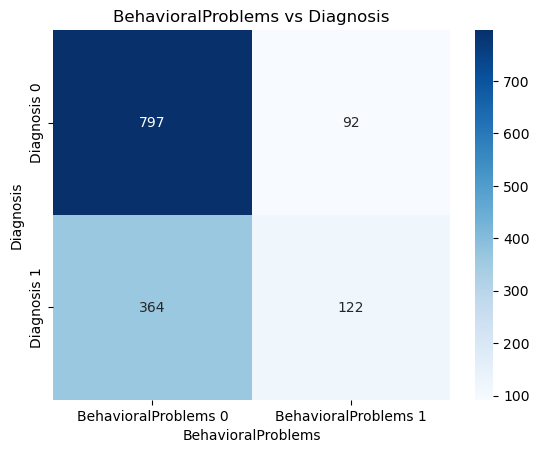

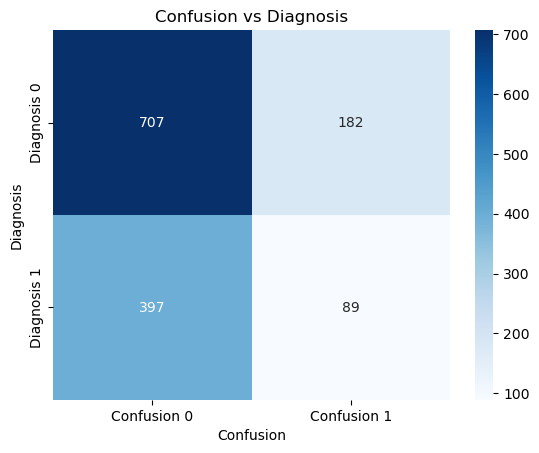

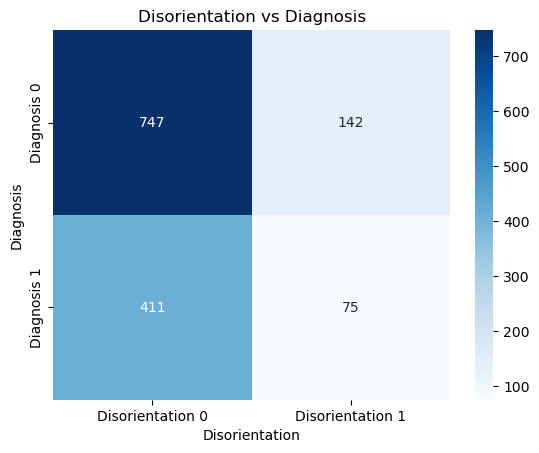

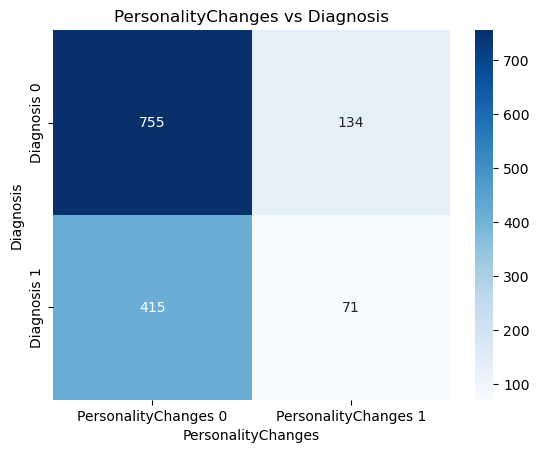

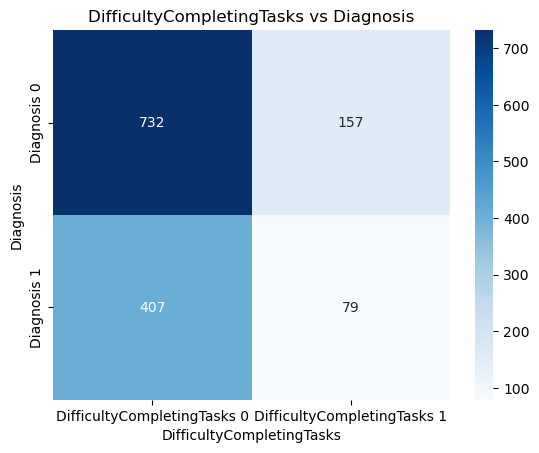

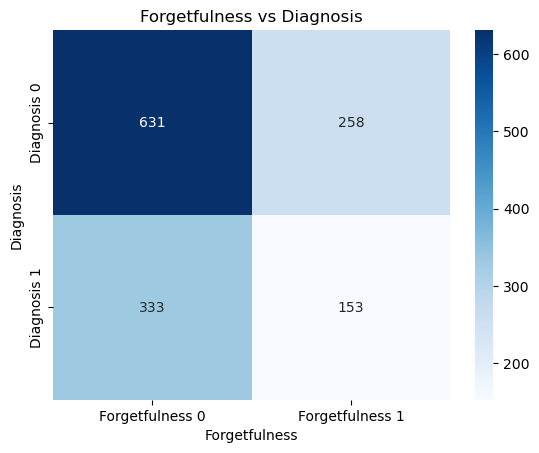

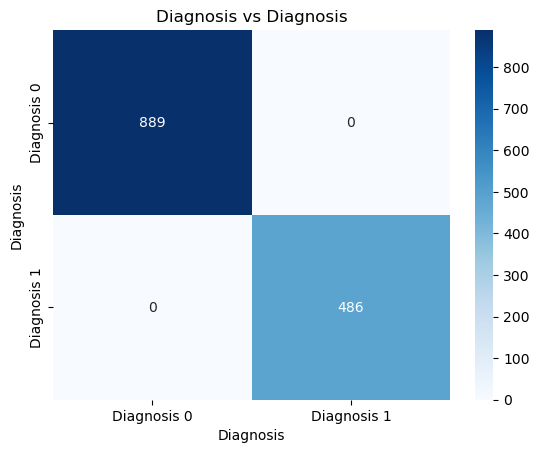

In [46]:
from sklearn.metrics import confusion_matrix
boolean_features = ['Gender' , 'Smoking' , 'FamilyHistoryAlzheimers' , 'CardiovascularDisease','Diabetes', 'Depression', 'HeadInjury', 
                    'Hypertension' ,'MemoryComplaints', 'BehavioralProblems' , 'Confusion','Disorientation', 'PersonalityChanges', 
                    'DifficultyCompletingTasks','Forgetfulness','Diagnosis' ]

confusion_matrices = {}
for item in boolean_features:
    confusion_matrices[item] = confusion_matrix(df_train.Diagnosis, df_train[item])
    sns.heatmap(confusion_matrices[item], annot=True, fmt="d", cmap="Blues", 
                xticklabels=[item+" 0", item+" 1"], yticklabels=["Diagnosis 0", "Diagnosis 1"])
    plt.xlabel(item)
    plt.ylabel("Diagnosis")
    plt.title(item+" vs Diagnosis")
    plt.show()

### **Grouped Plots for Categorical Features**

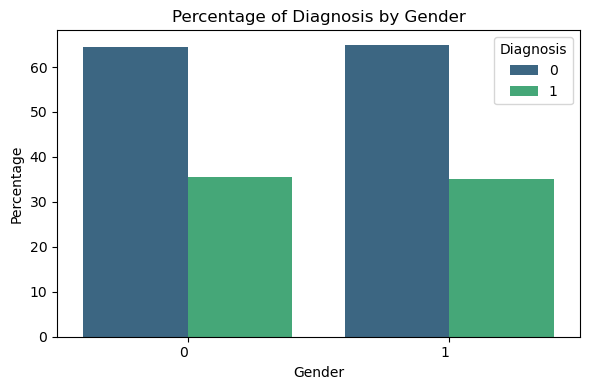

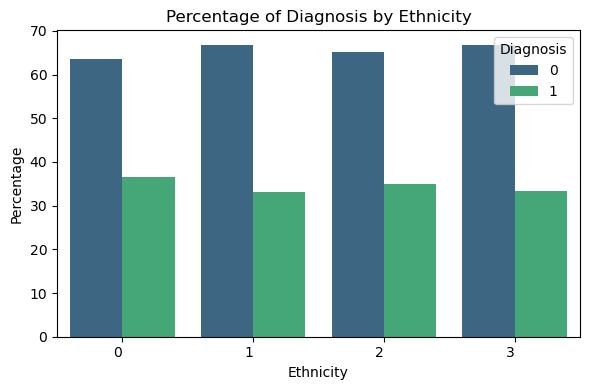

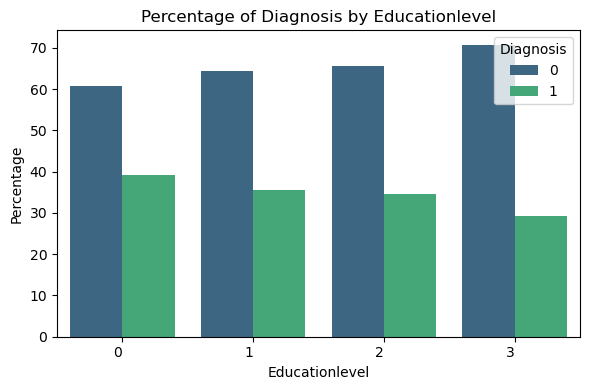

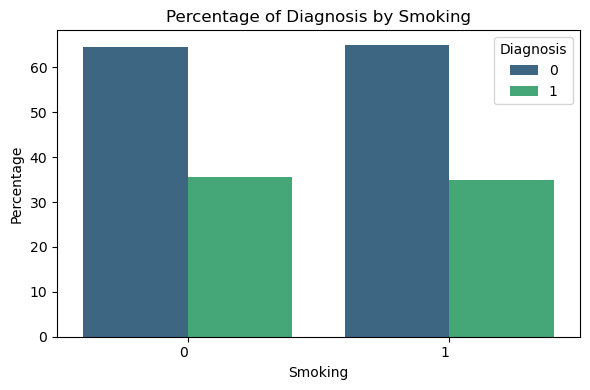

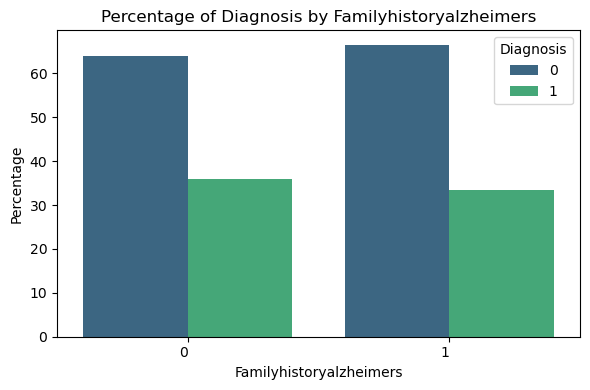

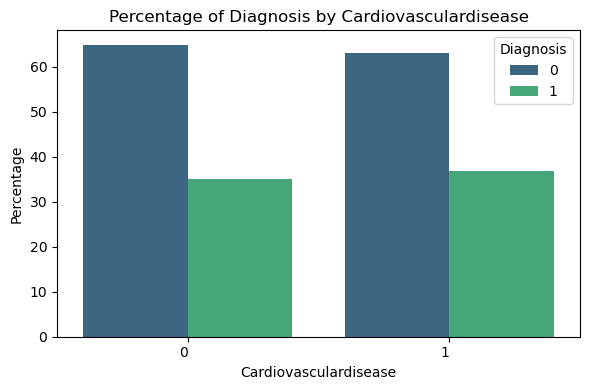

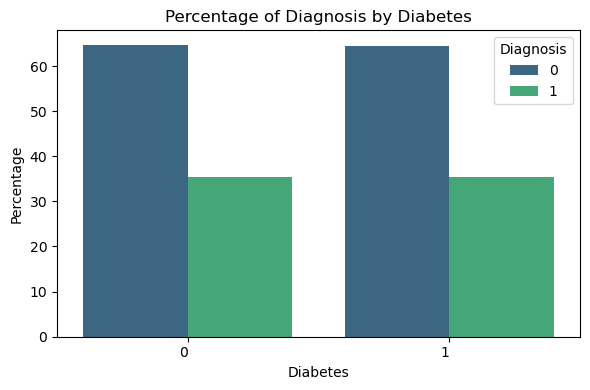

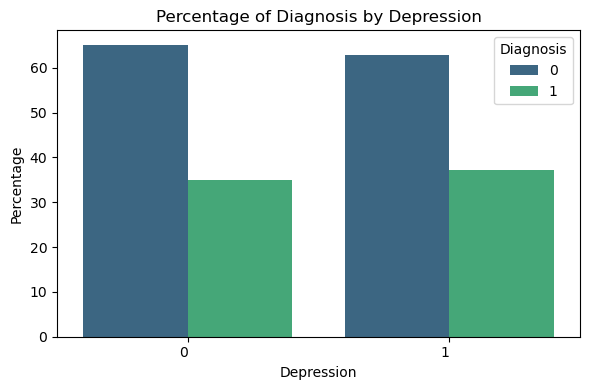

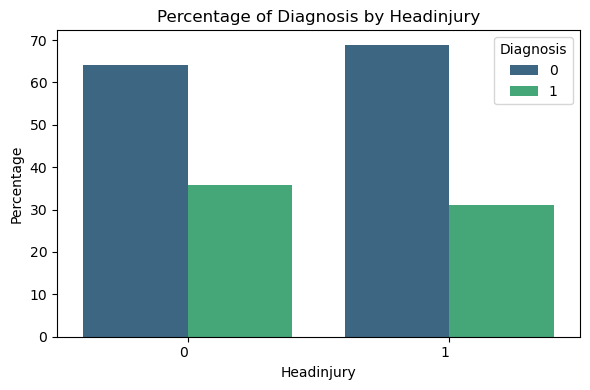

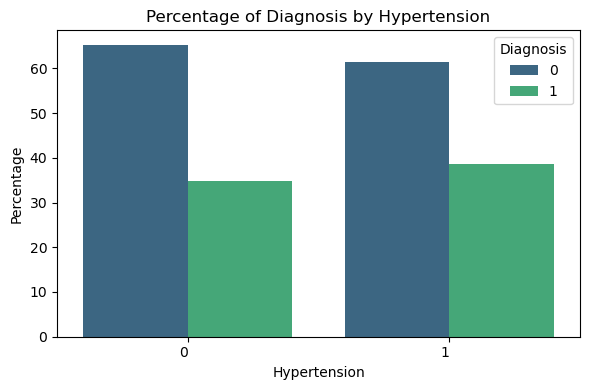

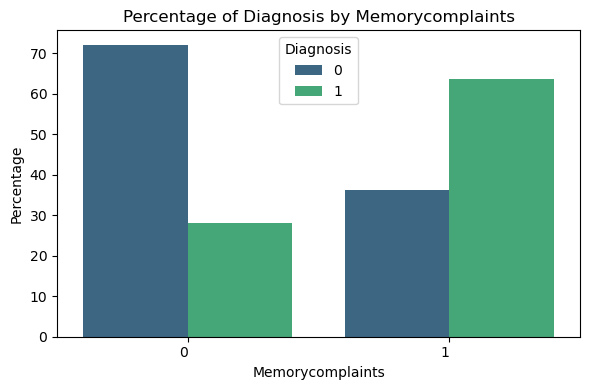

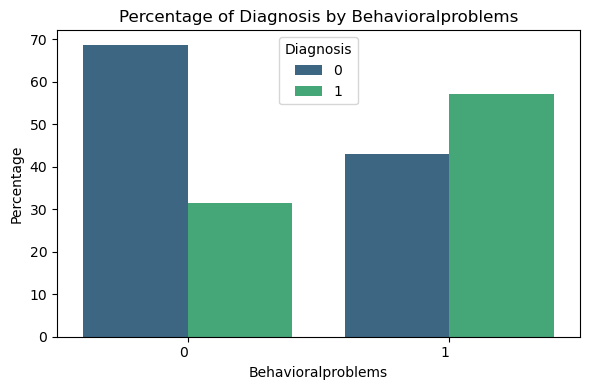

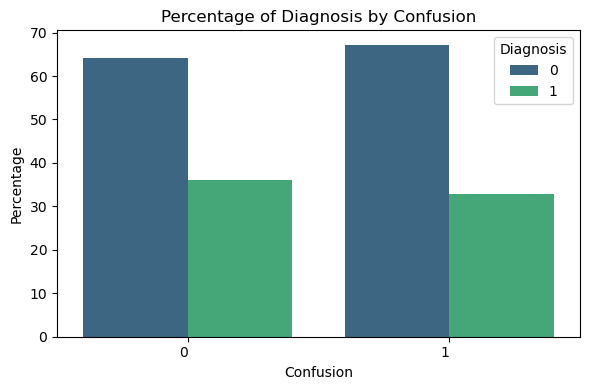

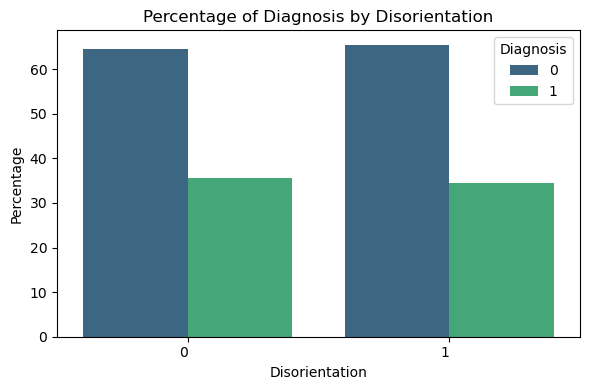

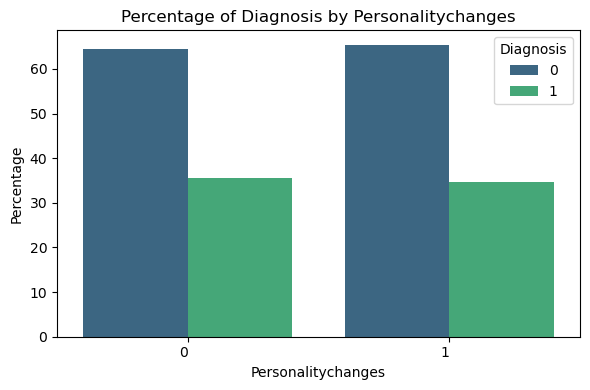

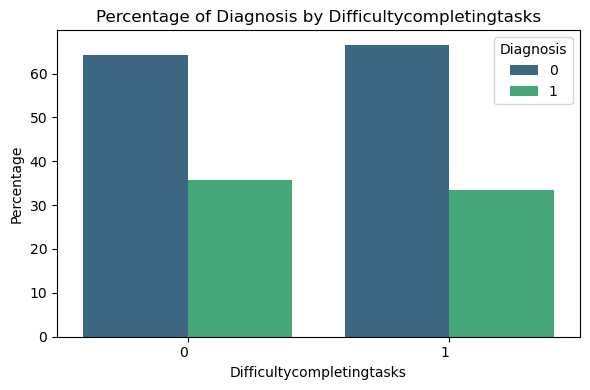

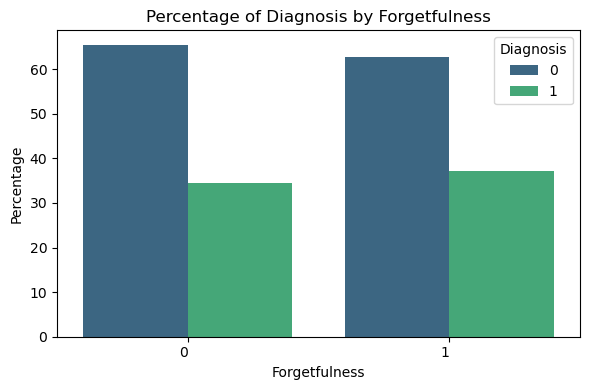

In [48]:
for i, col in enumerate(categorical_features):
    # Group by categorical variable and target variable (Diagnosis)
    grouped_data = df_train.groupby([col, 'Diagnosis']).size().reset_index(name='count')

    # Normalize to get percentages
    grouped_data['percentage'] = grouped_data['count'] / grouped_data.groupby(col)['count'].transform('sum') * 100

    # Create a bar plot for each categorical variable
    plt.figure(figsize=(6, 4))
    sns.barplot(
        data=grouped_data,
        x=col,
        y='percentage',
        hue='Diagnosis',
        palette="viridis"
    )

    plt.xticks(rotation=0, ha='right')
    plt.title(f"Percentage of Diagnosis by {col.replace('_', ' ').title()}")
    plt.ylabel("Percentage")
    plt.xlabel(col.replace('_', ' ').title())
    plt.legend(title="Diagnosis")
    plt.tight_layout()
    plt.show()

## **Distribution of Numerical Features**

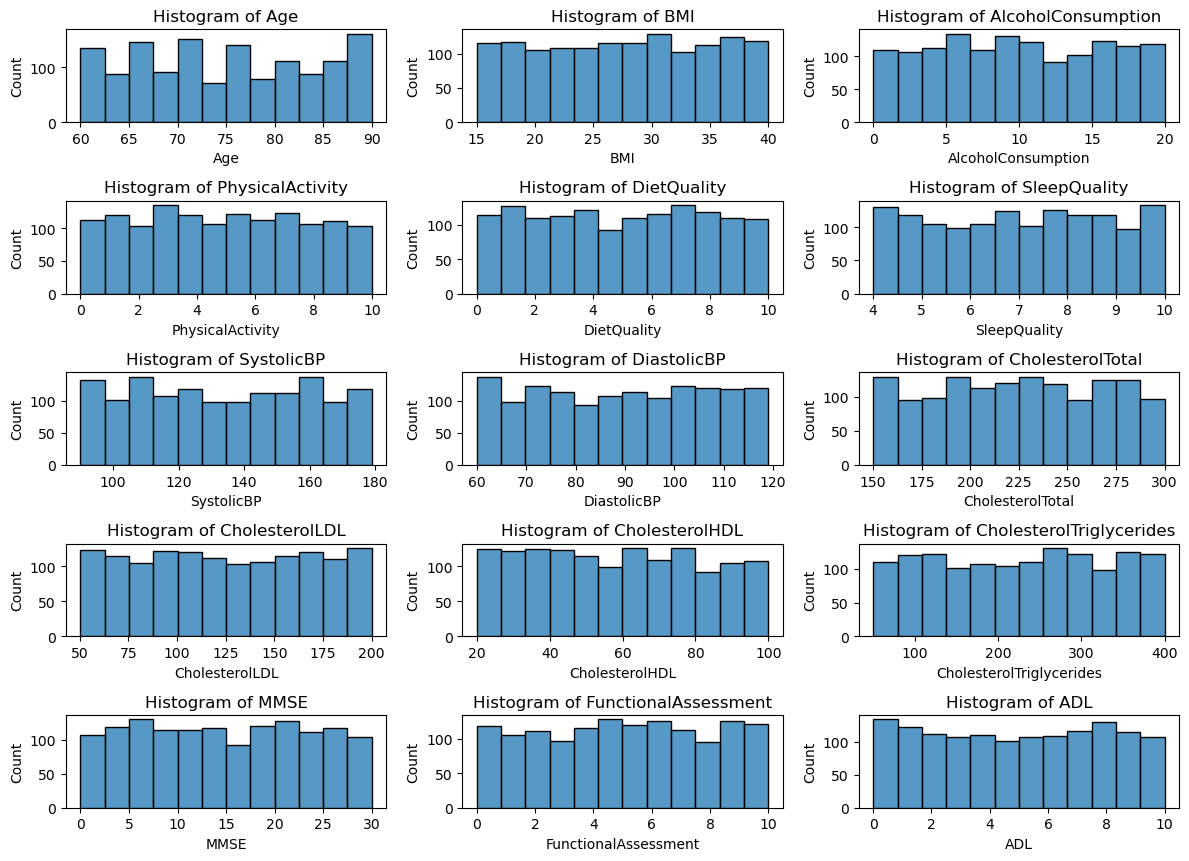

In [50]:
plt.figure(figsize=(12,10))
for i, col in enumerate(numerical_features, 1):
  plt.subplot(len(numerical_features)// 3+1, 3, i)
  sns.histplot(df_train[col])
  plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()